In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import clear_output
import seaborn as sns

In [27]:
def get_noise(batch_size):
    return(torch.rand(batch_size , 1))
def get_real(batch_size):
    return(torch.randn(batch_size , 1))    

In [28]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(1,64),
            nn.ReLU(),
            nn.Linear(64,1)        
        )
    def forward(self,x):
        return(self.main(x))
gen = Generator()

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(1,64),
            nn.ReLU(),
            nn.Linear(64,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return(self.main(x))
dis = Discriminator()

In [33]:
gen

Generator(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [34]:
dis

Discriminator(
  (main): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
    (3): Sigmoid()
  )
)

In [29]:
gen_opt = torch.optim.Adam(gen.parameters() , lr=0.001)
dis_opt = torch.optim.Adam(dis.parameters() , lr=0.001)

In [30]:
def update_dis(batch_size):
    real_sample = get_real(batch_size)
    prob_real_is_real = dis(real_sample)
    
    noise = get_noise(batch_size)
    gen_sample = gen(noise)
    prob_fake_is_fake = 1 - dis(gen_sample)
    
    loss = - ( (torch.log(prob_real_is_real) + torch.log(prob_fake_is_fake)) ).mean()
    
    dis_opt.zero_grad()
    loss.backward()
    dis_opt.step()
    
    return loss.data.numpy().item()

In [31]:
def update_gen(batch_size):
    noise = get_noise(batch_size)
    gen_sample = gen(noise)
    prob_fake_is_real = dis(gen_sample)
    
    loss = - ( (torch.log(prob_fake_is_real)) ).mean()
    
    gen_opt.zero_grad()
    loss.backward()
    gen_opt.step()
    
    return loss.data.numpy().item()

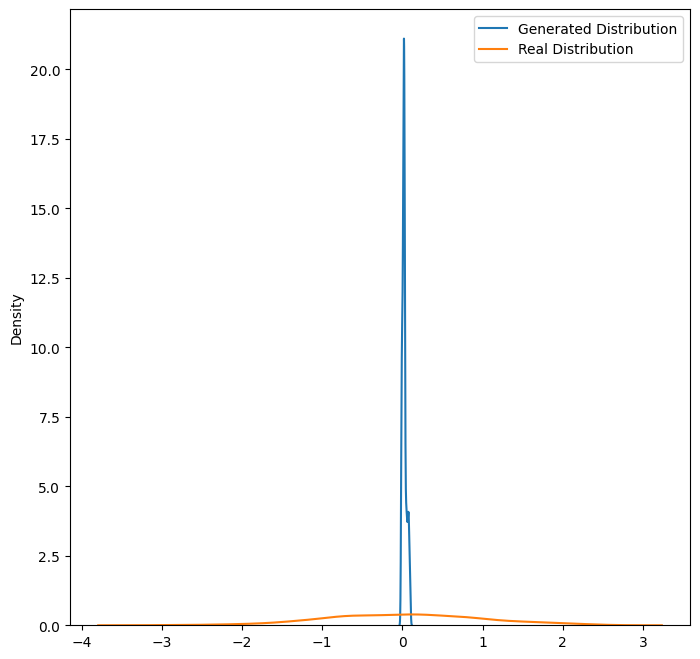

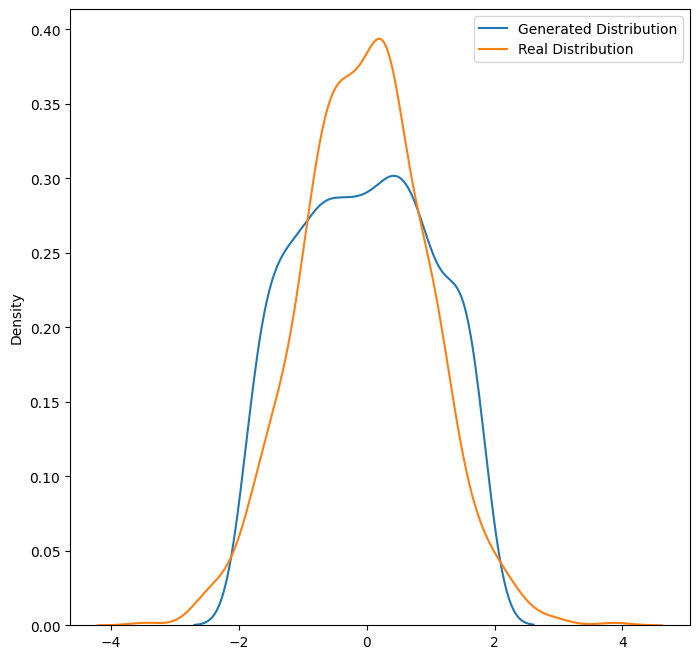

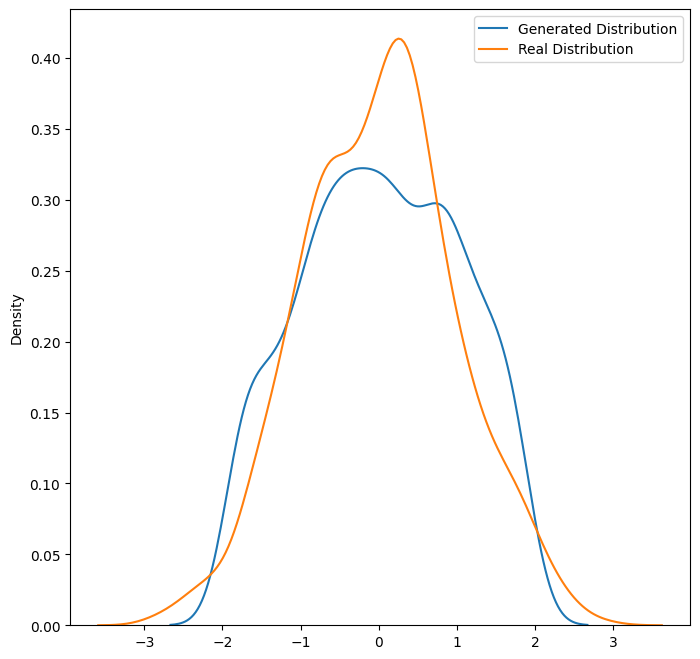

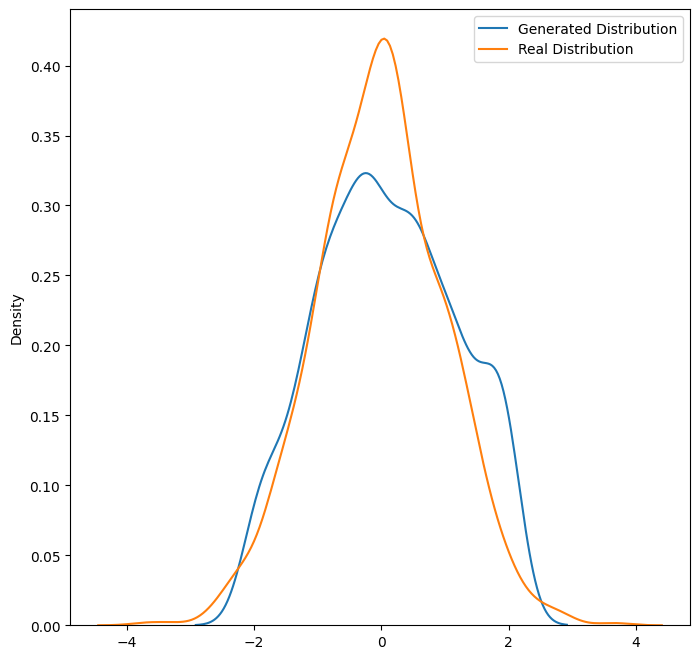

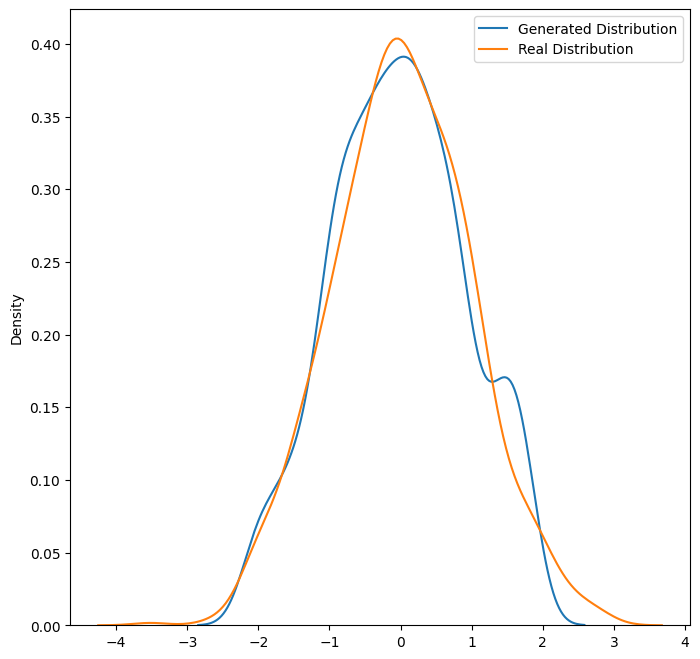

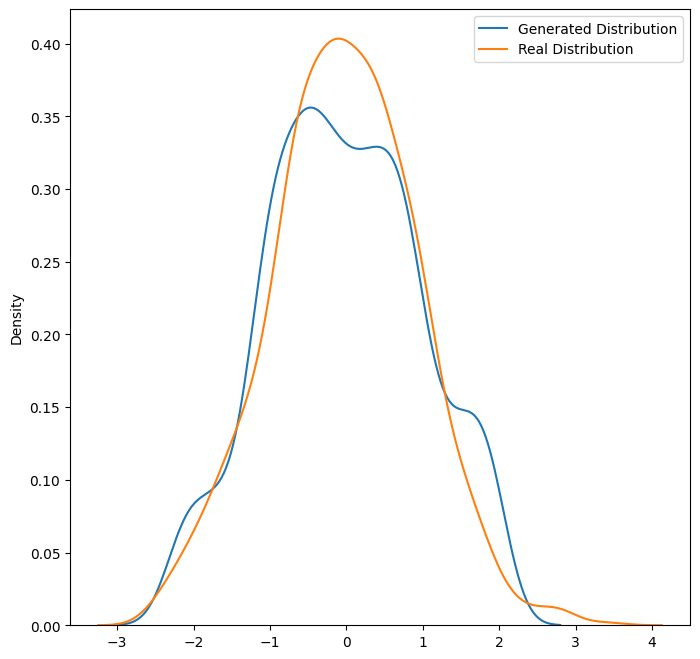

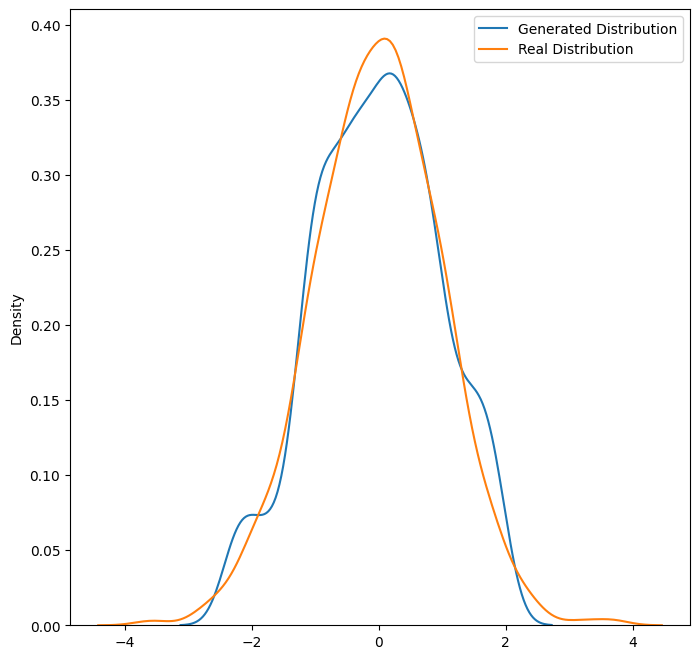

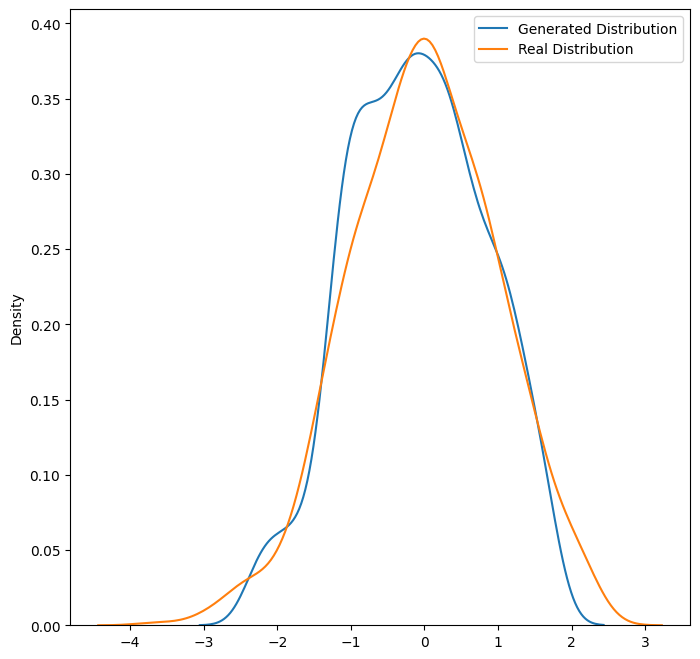

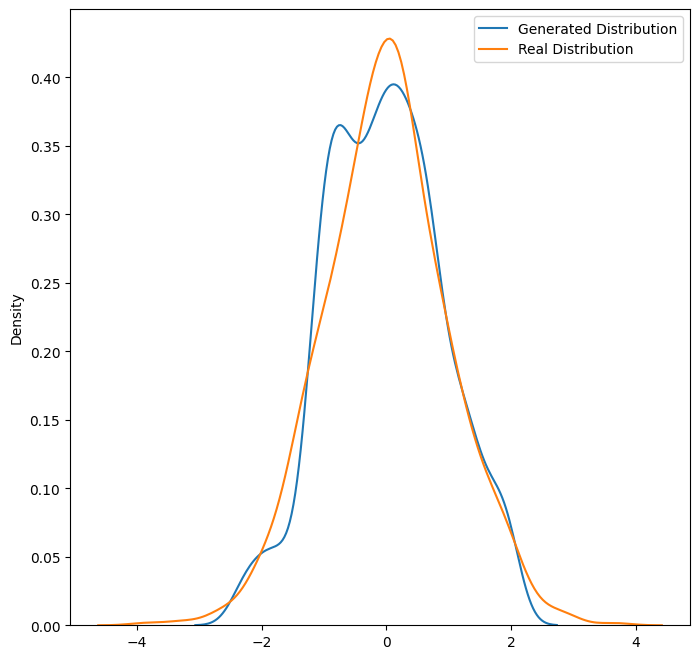

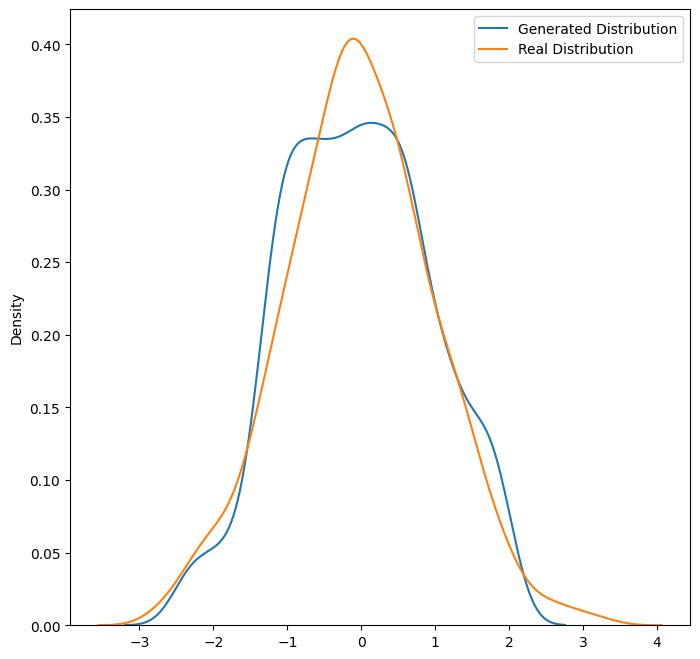

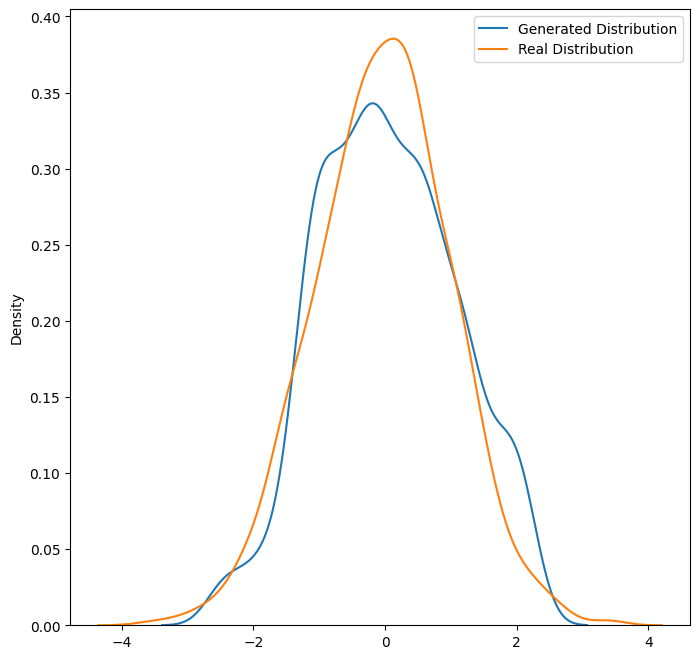

In [32]:
from IPython.display import clear_output
num_updates = 10
batch_size = 64

for i in range(10001):
    for j in range(num_updates):
        update_dis(batch_size)
    update_gen(batch_size)
    if i % 1000 == 0:
        #clear_output(True)
        plt.figure(figsize=[8, 8])     
        sns.kdeplot(gen(get_noise(1000)).data.numpy()[:, 0], label='Generated Distribution')
        sns.kdeplot(get_real(1000).numpy()[:, 0], label='Real Distribution')
        plt.legend()
        plt.show()
